# Pymaceuticals Inc.
---
### Analysis

Reviewing the data it's clear that Capomulin and Ramicane are the top best performing regimens, appearing to preform equally well (Bar plot and Box plot). Both regimens had mice with the longest timepoint (Summary statistics section, Data frame: pharma_df3). 

Comparing Capomulin and Ramicane in more details, Ramicane performs better than Capomulin on multiple statistics, (leaderboard/Data Frame: pharma_df3). Follow-up and more detailed analysis are recommended for Tumor Volume and Timepoints for each individual mice of Capomulin Regimen. 
During review/analysis of Mouse "l509", it a sharp increase in Tumor volume size before a sharp drop in volume/size. Analyzing if this is specific for this particular mouse or if all mice experienced the same event is recommended since the short-term increase in size can be misleading indicator of drug efficacy. 

Additional analysis by gender would also be informative and a more equal number of male and female mice would allow for more accurate representation and data.

In conclusion, Capomulin was top performing drug regimen with recommendation for further analysis by gender and focusing on tumor volume/size for each individual mouse on Capomulin.



In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns


In [2]:
# Study data files

# Point the path to data
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Import ans read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Verify Data (Mouse)
mouse_metadata.info()

# Verify Data (Results)
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [3]:
# Combine Data into single DataFrame
pharma_df = pd.merge(study_results, mouse_metadata, on=['Mouse ID'])

# Review Merged data
pharma_df.info()
pharma_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Review merged data (cont.)
pharma_df.shape

(1893, 8)

In [5]:
# Checking the number of mice (by Mouse ID)
unique_count = pharma_df['Mouse ID'].nunique() # Code given by Bootcamp Xpert
unique_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = pharma_df[pharma_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)] # Following code provided by Bootcamo Xpert

# Display the duplicates
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID.

dup_mouse = pharma_df[pharma_df['Mouse ID'] == 'g989'] # Code provided by Bootcamp Xpert
dup_mouse.info()
dup_mouse

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 107 to 1592
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            13 non-null     object 
 1   Timepoint           13 non-null     int64  
 2   Tumor Volume (mm3)  13 non-null     float64
 3   Metastatic Sites    13 non-null     int64  
 4   Drug Regimen        13 non-null     object 
 5   Sex                 13 non-null     object 
 6   Age_months          13 non-null     int64  
 7   Weight (g)          13 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 936.0+ bytes


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

pharma_df2 = pharma_df[pharma_df['Mouse ID'] != 'g989'] # Code provided by Bootcamp Xpert
pharma_df2.info()
pharma_df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
pharma_df2.shape

(1880, 8)

In [10]:
# Checking the number of mice in the clean DataFrame.
unique_count =pharma_df2['Mouse ID'].nunique()
unique_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Mean Table
mean_tumor = pharma_df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_tumor


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of median of the tumor volume for each regimen
median_tumor = pharma_df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median_tumor


Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Generate a summary statistics table of variance of the tumor volume for each regimen
variance_tumor = pharma_df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance_tumor


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Generate a summary statistics table of standard deviation of the tumor volume for each regimen
std_tumor = pharma_df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_tumor


Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Generate a summary statistics table of SEM of the tumor volume for each regimen
sem_tumor = pharma_df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_tumor


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
pharma_df3 = pd.DataFrame({
    'Mean Tumor Vol': mean_tumor,
    'Median Tumor Vol': median_tumor,
    'Tumor Vol Variance': variance_tumor,
    'Tumor Vol Std. Dev.': std_tumor,
    'Tumor Vol Std. Err.': sem_tumor,
})

pharma_df3

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std. Dev.,Tumor Vol Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line, Code provided by instructor during HW review
# df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

## Bar and Pie Charts

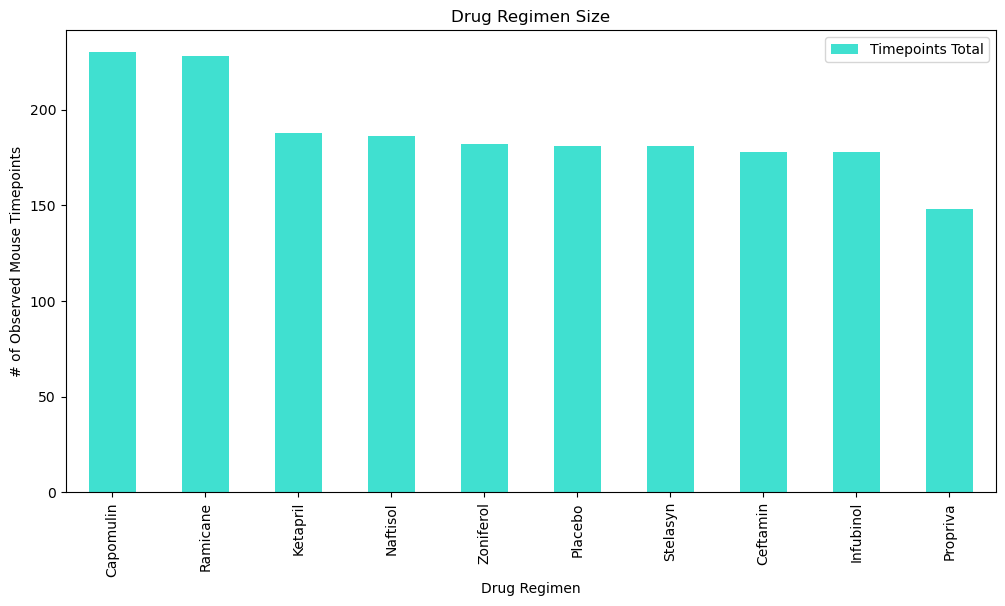

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group and Count: Use the groupby method to group by the desired column and then use size() or count() to get the counts.
pharma_grouped = pharma_df2.groupby('Drug Regimen').size().sort_values(ascending= False).reset_index(name='Timepoints Total')

#Create the Bar Chart using pandas
pharma_grouped.set_index('Drug Regimen').plot(kind='bar', figsize=(12, 6), title='Drug Regimen Size', color= 'turquoise')

# Customize and show the chart
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()



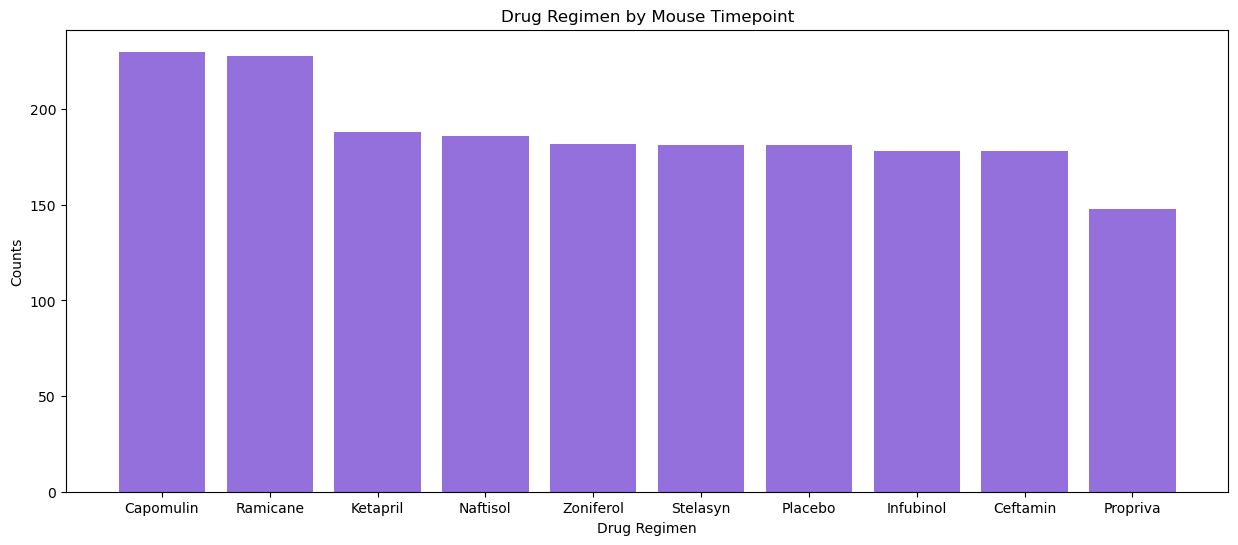

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group and count of "Drug Regimen" , Xpert used for assistance
drug_counts = pharma_df2['Drug Regimen'].value_counts()

# Create a bar chart
plt.figure(figsize= (15, 6))
plt.bar(drug_counts.index, drug_counts.values, color='mediumpurple')

# Add title and labels
plt.title('Drug Regimen by Mouse Timepoint')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')

# Show the plot
plt.show()


In [20]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender using the mouse metadata dataframe and removing the duplicate mouse
mouse_gender = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989"].reset_index(drop=True) 
mouse_gender.shape


(248, 5)

In [21]:
mouse_gender.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


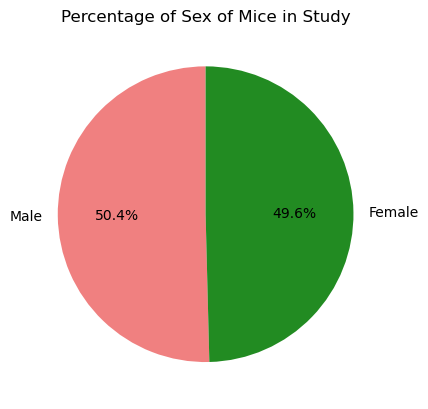

In [22]:
# Make the pie chart using pandas
# Count the occurrences of each category
gender_counts = mouse_gender['Sex'].value_counts()

# Create a pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'forestgreen'])

# Customize the chart
plt.title('Percentage of Sex of Mice in Study')
plt.ylabel('')  # Optional: remove the y-axis label
plt.show()

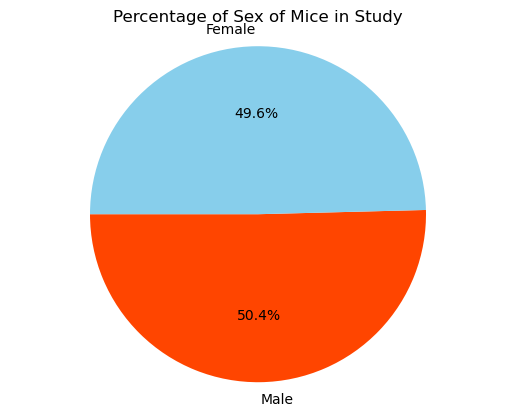

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Make the pie chart

# Data for the pie chart
labels = gender_counts.index  # Categories
sizes = gender_counts.values  # Counts

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=['orangered', 'skyblue'])

# Customize the chart
plt.title('Percentage of Sex of Mice in Study')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
pharma_max = pharma_df2.groupby("Mouse ID").Timepoint.max().reset_index() # New left data Frame containing only max timepoint values 
pharma_max
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Sample data for left DataFrame

# Perform a left join on the 'ID' column
max_pharmadf = pd.merge(pharma_max, pharma_df2, on= ['Mouse ID', 'Timepoint'], how= "left")

# Keep only required 4 drugs (Capomulin, Ramicane, Infubinol, and Ceftamin) by masking and droping other drugs
four_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = max_pharmadf["Drug Regimen"].isin(four_drugs)
max_pharmadf = max_pharmadf.loc[mask].reset_index(drop=True)
max_pharmadf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [25]:
# Put treatments into a list for the for-loop (and later for plot labels)
treatments = max_pharmadf['Drug Regimen'].unique()

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each treatment and analyze tumor volumes
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = max_pharmadf[max_pharmadf['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the list (for plotting)
    tumor_vol_data.append(subset)
    
    # Calculate the IQR
    Q1 = subset.quantile(0.25)  # First quartile
    Q3 = subset.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1               # Interquartile range
    
    # Determine potential outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify any outliers
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    # Print the results
    print(f'Treatment: {treatment}')
    print(f'IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    print(f'Potential Outliers: {outliers.tolist()}')
    print()

# Now `tumor_vol_data` contains the subsets, and you’ve determined the outliers.


Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
Potential Outliers: []

Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
Potential Outliers: []

Treatment: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Potential Outliers: []



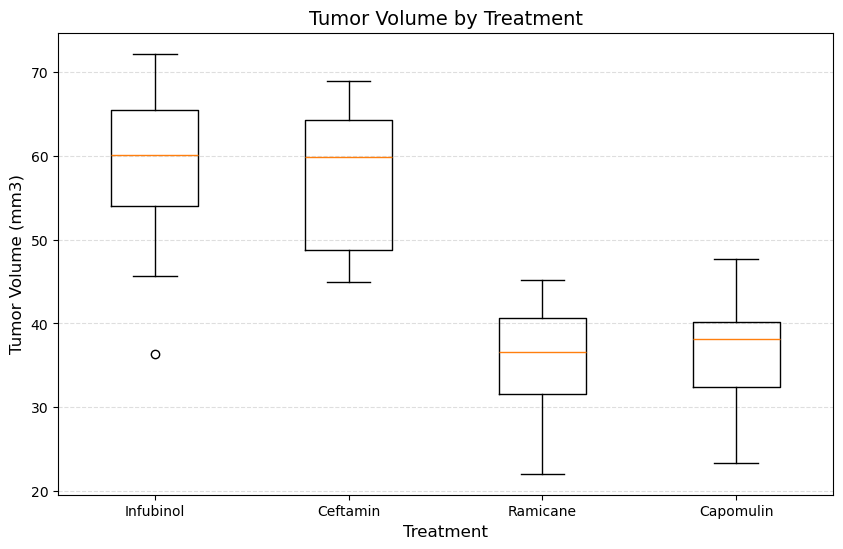

In [26]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Code reviewed with ChatGPT

# Box plot for tumor volume data
plt.figure(figsize=(10, 6))  # Set figure size

# Create the box plot
plt.boxplot(tumor_vol_data, tick_labels=treatments)

# Add titles and labels
plt.title("Tumor Volume by Treatment", fontsize=14)
plt.xlabel("Treatment", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

# Add in a background grid (Code provided by Instructor)
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show the plot
plt.show()


## Line and Scatter Plots

In [27]:
#Generate a line plot of tumor volume vs. time point for a single mouse (l509) treated with Capomulin
# Filter the data for the specific mouse ID and verfy
mouse_id = 'l509'  # Replace with the actual mouse ID
mouse_df= pharma_df2[pharma_df2['Mouse ID'] == mouse_id]
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


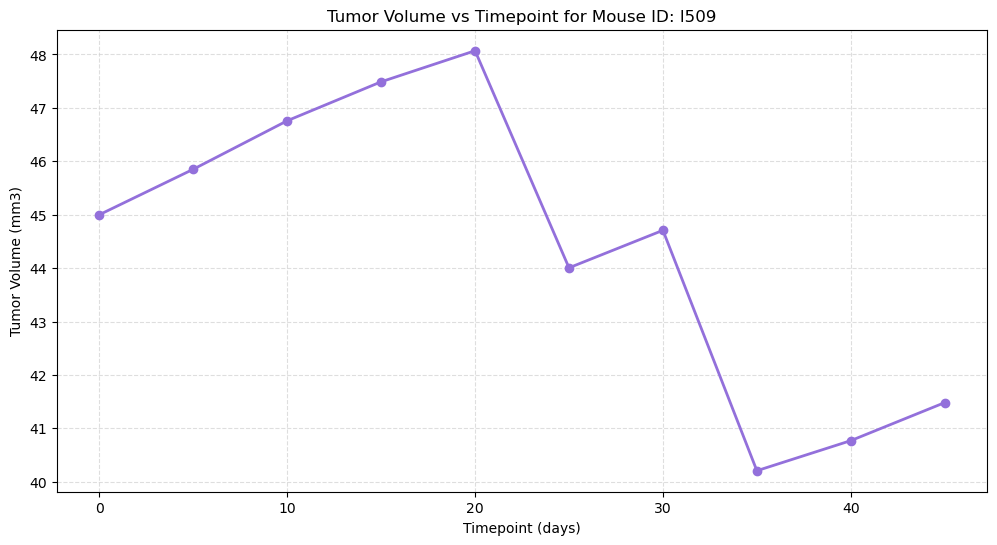

In [28]:
# Create Line chart for specific mouse (l509) cont.

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', color= "mediumpurple", linewidth= 2)
plt.title(f'Tumor Volume vs Timepoint for Mouse ID: {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(linestyle="--", color="lightgrey", alpha=0.75) # Customize grid line
plt.show()


In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the specific Drug Regimen and verfy
capomulin = 'Capomulin'
capomulin_df= pharma_df2[pharma_df2['Drug Regimen'] == capomulin]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [30]:
# Calculate the average tumor volume and weight for each mouse
avg_tumor_vol = capomulin_df.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'  # Get the weight for each mouse
}).reset_index()
avg_tumor_vol

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


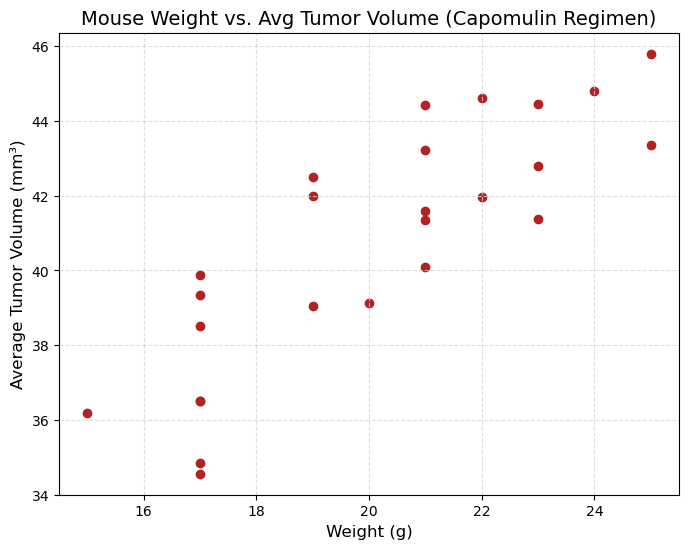

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen cont.
# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color='firebrick')

# Add labels, title, and grid
plt.title(f"Mouse Weight vs. Avg Tumor Volume ({capomulin} Regimen)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm³)", fontsize=12)
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show the plot
plt.show()

## Correlation and Regression

In [32]:
# Correlation Coefficient
correlation = avg_tumor_vol['Tumor Volume (mm3)'].corr(avg_tumor_vol['Weight (g)'])
correlation

0.8419363424694721

The correlation between mouse weight and the average tumor volume is: 0.84


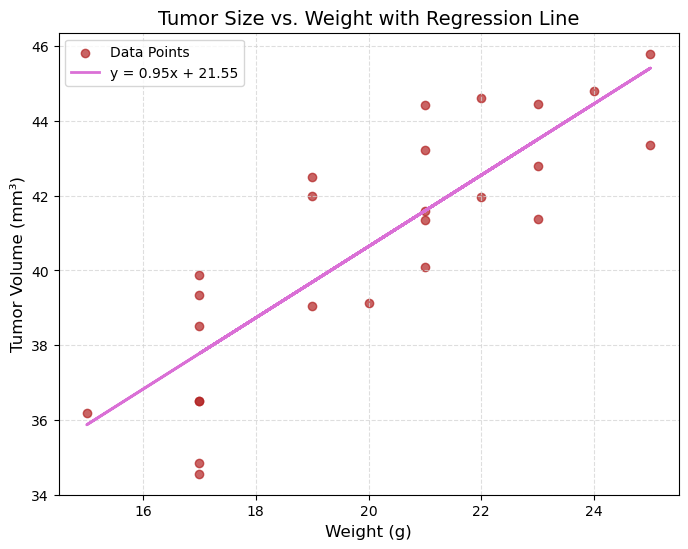

In [33]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Extract tumor volume and weight as variables
x = avg_tumor_vol['Weight (g)']          # Independent variable (Weight)
y = avg_tumor_vol['Tumor Volume (mm3)']    # Dependent variable (Tumor Size)

# Plot scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data Points", color="firebrick", alpha=0.7)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Add regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color="orchid", linewidth = 2, label=f"y = {slope:.2f}x + {intercept:.2f}")

print(f"The correlation between mouse weight and the average tumor volume is: {correlation :.2f}")

# Add labels, title, and legend
plt.title("Tumor Size vs. Weight with Regression Line", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm³)", fontsize=12)
plt.legend()
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show the plot
plt.show()
